LINEAR REGRESSION

In [1]:
import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Preparing The Data

In [3]:
X_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state = 1)

#converting them into tensors
X = torch.from_numpy(X_numpy.astype(np.float32)) # before converting into tensors convert numpy array's datatype into float32 from double
y = torch.from_numpy(y_numpy.astype(np.float32))
print(y.shape)

#Reshape y (from 1 row to multiple rows where each row contains a value)
y = y.view(y.shape[0],1)
print(y.shape)

n_samples,n_features = X.shape

torch.Size([100])
torch.Size([100, 1])


Model

In [5]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

Loss and Optimizer

In [6]:
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

Training Loop

In [7]:
num_epochs = 100
for epoch in range(num_epochs):
    
    #forward pass and loss
    y_hat = model(X)
    loss = criterion(y_hat,y)
    
    #backward pass
    loss.backward()
    
    #update weights
    optimizer.step()
    
    #empty the gradients
    optimizer.zero_grad()
    
    if(epoch+1)%10==0:
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

epoch: 10, loss=4413.4302
epoch: 20, loss=3293.0884
epoch: 30, loss=2482.1875
epoch: 40, loss=1894.6469
epoch: 50, loss=1468.5322
epoch: 60, loss=1159.2161
epoch: 70, loss=934.4993
epoch: 80, loss=771.1194
epoch: 90, loss=652.2521
epoch: 100, loss=565.7146


Plotting the actual and predicted values

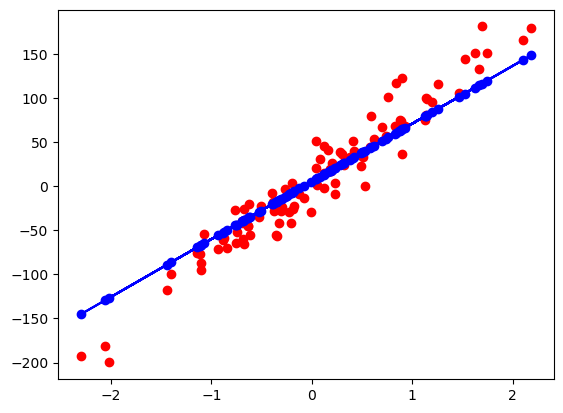

In [9]:
predicted = model(X).detach()  #because we want to prevent the model(x) operation from being tracked by computational graph 
predicted = predicted.numpy() #converting from tensor to numpy

#plotting the groud truths as red dots
plt.plot(X_numpy, y_numpy,'ro')

#plotting the predicted values as blue dots which form a blue line
plt.plot(X_numpy,predicted,'bo')
plt.plot(X_numpy,predicted,'b')

plt.show()
